k-nearest neighbor<br>
custom code<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#compute l p distance, for l(infinity) use p = 'inf'
def l_p_dist(x, y, p):
    x_len = len(x)
    y_len = len(y)
    
    if x_len != y_len:
        print("vectors do not match in length")
        return None
    
    length = 0
    
    if p == 'inf':
        for i in range(0,x_len):
            temp = (x[i] - y[i])
            if length > temp:
                length = temp
    
    else:
        for i in range(0,x_len):
            temp = (abs(x[i] - y[i]))**p
            length = length + temp

        length = (length)**(1/p)
    
    return length

In [16]:
## Takes a vector x and returns the index of its nearest neighbors in p train_data
def find_NN(x, p):
    # Compute distances from x to every row in train_data
    distances = [l_p_dist(x,train_data[i,], p) for i in range(len(train_labels))]
    #push distances to np array
    distances = np.array(distances)
    # Get the index of the smallest distance
    nearest = distances.argsort()
    return nearest

In [17]:
## Takes a vector x and returns the class of its k nearest neighbors in  p train_data
def NN_classifier(x, p, k):
    # Get the index of the the nearest neighbor
    indices = find_NN(x, p)
    #define dummy list for results
    dummy_list = []
    #loop thru indicies and get training classifications
    for i in range(0,k):
        dummy_list.append(train_labels[indices[i]])
    #push dummy list to np array
    np_arr = np.array(dummy_list)
    #get majority class
    u, c = np.unique(x, return_counts = True)
    classification = u[c == c.max()]    
    #Return its class
    return classification

In [18]:
##define train_data and train_labels
## Load the training set
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')

## Load the testing set
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

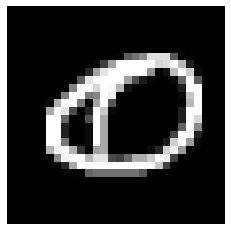

Label 0


In [19]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

## Now view the first data point in the test set
vis_image(0, "test")




In [22]:
x = test_data[0,]
p = 'inf'
k = 5

print(NN_classifier(x, p, k))

[0.]
